In [1]:
import pandas as pd

In [2]:
city_df = pd.read_csv('city_data.csv')
ride_df = pd.read_csv('ride_data.csv')

In [3]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
df = city_df.merge(ride_df, on='city')

In [6]:
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [77]:
city_group = df.groupby(['city', 'type'])
# tmp = df.groupby(['city', 'type'])
# tmp.head()

In [70]:
city_group.get_group('Amandaburgh').count()

city            18
driver_count    18
type            18
date            18
fare            18
ride_id         18
dtype: int64

In [78]:
# Amandaburgh
new_df = city_group.agg({'fare':'mean', 'driver_count':'count','ride_id':'count'}).rename(columns={'fare':'Average Fare', 'driver_count':'Number of drivers', 'ride_id':'Number of Rides'})

In [79]:
new_df

,,Average Fare,Number of drivers,Number of Rides
city,type,,,
Amandaburgh,Urban,24.641667,18,18
Barajasview,Urban,25.332273,22,22
Barronchester,Suburban,36.422500,16,16
Bethanyland,Suburban,32.956111,18,18
Bradshawfurt,Rural,40.064000,10,10
Brandonfort,Suburban,35.437368,19,19
Carriemouth,Urban,28.314444,27,27
Christopherfurt,Urban,24.501852,27,27
Colemanland,Suburban,30.894545,22,22


In [80]:
import matplotlib.pyplot as plt
new_df_reset = new_df.reset_index()
new_df_reset['Number of Rides']

0      18
1      22
2      16
3      18
4      10
5      19
6      27
7      27
8      22
9      17
10     19
11      9
12     17
13     29
14     13
15     27
16     12
17      3
18     25
19     15
20      6
21     24
22     28
23     25
24      6
25     21
26     25
27     27
28     30
29     17
       ..
90     31
91     19
92      7
93     38
94     19
95      8
96     31
97     31
98      4
99     22
100     6
101    22
102    17
103    14
104    39
105    30
106    26
107    18
108    23
109    21
110     9
111    28
112    26
113    20
114    16
115    31
116    25
117    14
118    23
119    20
Name: Number of Rides, Length: 120, dtype: int64

Text(0.5, 1.0, 'Rides vs Fare')

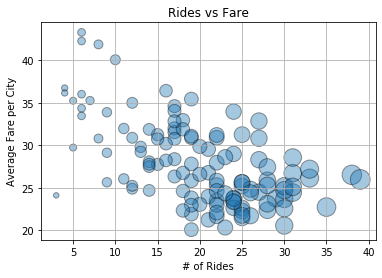

In [82]:
plt.scatter(new_df_reset['Number of Rides'], new_df_reset['Average Fare'], s = [row['Number of Rides']*10 for index, row in new_df_reset.iterrows()], alpha=0.4, edgecolor='black')
plt.xlabel('# of Rides')
plt.ylabel('Average Fare per City')
plt.grid()
plt.title('Rides vs Fare')

In [18]:
import seaborn as sns
import pandas as pd
%matplotlib inline

In [11]:
df = sns.load_dataset('titanic')

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
tmp = df.loc[df.sex == 'female']

In [16]:
tmp

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


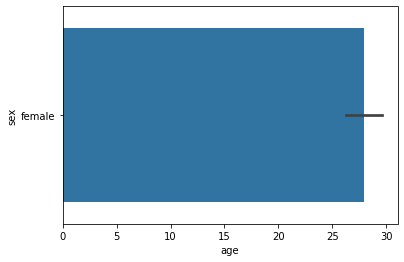

In [19]:
sns.barplot('age', 'sex', data=tmp)